In [4]:
!pip install shap

In [5]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [6]:
pip install streamlit-option-menu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 3.7 MB/s eta 0:00:00


In [7]:
!pip install huggingface_hub

In [8]:
!pip install Langchain

In [9]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00


In [10]:
!pip install openai

In [11]:
#importing dependences
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap
warnings.filterwarnings('ignore')

In [12]:
# loading the diabetes dataset to a pandas DataFrames
diabetes_dataset = pd.read_csv('/content/diabetes (2).csv')
diabetes_dataset.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
# number of rows and Columns in this dataset
diabetes_dataset.info()
diabetes_dataset = diabetes_dataset.astype({'age':'int'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
#Replacing with numeric
diabetes_dataset['gender'].replace(['Other', 'Male','Female'],[2,0,1], inplace=True)
diabetes_dataset['smoking_history'].replace(['never', 'No Info', 'current', 'former', 'ever', 'not current'],[0,1,2,3,4,5,], inplace=True)

In [15]:
#Removed Other because the values were very less
diabetes_dataset = diabetes_dataset[diabetes_dataset['gender'] != 2]
diabetes_dataset = diabetes_dataset.reset_index(drop=True)

In [16]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,0.585625,41.877878,0.074863,0.039427,1.306685,27.320757,5.527529,138.057810,0.085015
std,0.492616,22.535787,0.263172,0.194610,1.454212,6.636853,1.070665,40.709469,0.278906
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [17]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(diabetes_dataset.drop("diabetes", axis=1), diabetes_dataset["diabetes"], test_size=0.3)

In [18]:
#Model Training
classifier = xgb.XGBClassifier()
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
#Accuracy
print('Training accuracy {:.4f}'.format(classifier.score(X_train,Y_train)))
print('Testing accuracy {:.4f}'.format(classifier.score(X_test,Y_test)))

Training accuracy 0.9771
Testing accuracy 0.9699


In [20]:
#Making a Predictive System
input_data = (1,89,66,23,94,28.1,0.167,21)

In [21]:
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [22]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
 print('The person is not diabetic')
else:
 print('The person is diabetic')

[0]
The person is not diabetic


In [23]:
# Saving the trained model
import pickle
filename = 'diabetes_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [24]:
#explain prediction with the shap values
explainer=shap.Explainer(classifier)
shap_values=explainer(X_test)

In [25]:
heart_disease = pd.read_csv('/content/heart (1) (1).csv')
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(heart_disease.drop("target", axis=1),heart_disease["target"], test_size=0.3)

In [27]:
# number of rows and Columns in this dataset
heart_disease.info()
heart_disease= heart_disease.astype({'age':'int'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
# getting the statistical measures of the data
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
#GridSearchCV for finding the best hyperparameters
# Define the parameter grid
param_grid = {
'n_estimators': [100, 150, 200],
'learning_rate': [0.05, 0.1, 0.15],
'max_depth': [5, 6, 7],
'subsample': [0.4, 0.5, 0.6],
'colsample_bytree': [0.4, 0.5, 0.6],
'gamma': [0, 0.01, 0.1],
'reg_alpha': [0, 0.01, 0.1],
'reg_lambda': [0.5, 0.6, 0.7]
}

In [30]:
# Define the best accuracy and corresponding hyperparameters
best_accuracy = 0
best_params = {}

In [31]:
# Iterate over all parameter combinations
for n_estimators in param_grid['n_estimators']:
 for learning_rate in param_grid['learning_rate']:
  for max_depth in param_grid['max_depth']:
   for subsample in param_grid['subsample']:
    for colsample_bytree in param_grid['colsample_bytree']:
     for gamma in param_grid['gamma']:
      for reg_alpha in param_grid['reg_alpha']:
       for reg_lambda in param_grid['reg_lambda']:
        # Create the XGBoost classifier with the current parameter values
        classifier = xgb.XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        random_state=42
       )

In [32]:
# Fit the classifier to the training data
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [33]:
# Make predictions on the test set
predictions = classifier.predict(X_test)

In [34]:
predictions
if (prediction[0] == 0):
 print('The person has heart disease')
else:
 print('The person does not have heart disease')

The person has heart disease


In [35]:
# Calculate the accuracy score
accuracy = accuracy_score(Y_test, predictions)

In [36]:
# Check if this combination of parameters achieved a better accuracy
if accuracy > best_accuracy:
 best_accuracy = accuracy
 best_params = {
  'n_estimators': n_estimators,
  'learning_rate': learning_rate,
  'max_depth': max_depth,
  'subsample': subsample,
  'colsample_bytree': colsample_bytree,
  'gamma': gamma,
  'reg_alpha': reg_alpha,
  'reg_lambda': reg_lambda
 }

In [37]:
# Print the best hyperparameters and their corresponding accuracy score
print("Best Hyperparameters: ", best_params)
print("Accuracy Score: ", best_accuracy)

Best Hyperparameters:  {'n_estimators': 200, 'learning_rate': 0.15, 'max_depth': 7, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0.1, 'reg_alpha': 0.1, 'reg_lambda': 0.7}
Accuracy Score:  0.8461538461538461


In [38]:
#Bulding on the best parameters
classifier = xgb.XGBClassifier(**best_params, random_state=42)
classifier.fit(X_train, Y_train)
train_accuracy = classifier.score(X_train, Y_train)
print('Training accuracy: {:.4f}'.format(train_accuracy))
test_accuracy = classifier.score(X_test, Y_test)
print('Testing accuracy: {:.4f}'.format(test_accuracy))

Training accuracy: 1.0000
Testing accuracy: 0.8462


In [39]:
# Saving the trained model
import pickle
filename = 'heart_disease_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [40]:
liver_data = pd.read_csv('/content/liver (1).csv')
liver_data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [41]:
# number of rows and Columns in this dataset
liver_data.info()
liver_data =liver_data.astype({'Age':'int'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [42]:
#Replacing with numeric
liver_data['Gender'].replace(['Other', 'Male','Female'],[2,0,1], inplace=True)
liver_data['Dataset'].replace([1,2],[0,1], inplace=True)

In [43]:
#Removed Other because the values were very less
liver_data= liver_data[liver_data['Gender'] != 0]
liver_data = liver_data.reset_index(drop=True)

In [44]:
# getting the statistical measures of the data
liver_data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,142.000000,142.0,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,140.000000,142.000000
mean,43.133803,1.0,2.322535,0.989437,302.338028,54.239437,69.042254,6.653521,3.273239,0.949000,0.352113
std,15.899163,0.0,4.863417,2.398513,300.328139,94.023155,127.769733,1.134355,0.828218,0.288083,0.479320
min,7.000000,1.0,0.500000,0.100000,63.000000,10.000000,10.000000,3.600000,1.000000,0.300000,0.000000
25%,31.000000,1.0,0.700000,0.200000,165.000000,20.000000,21.000000,5.925000,2.800000,0.800000,0.000000
50%,45.000000,1.0,0.800000,0.200000,194.500000,26.000000,30.000000,6.800000,3.300000,0.900000,0.000000
75%,53.000000,1.0,1.100000,0.400000,293.000000,46.750000,57.000000,7.500000,3.900000,1.100000,1.000000
max,85.000000,1.0,27.700000,12.800000,1896.000000,790.000000,1050.000000,9.200000,5.500000,1.800000,1.000000


In [45]:
# Saving the trained model
import pickle
filename = 'liver_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

Text(0.5, 1.0, 'Correlation between features')

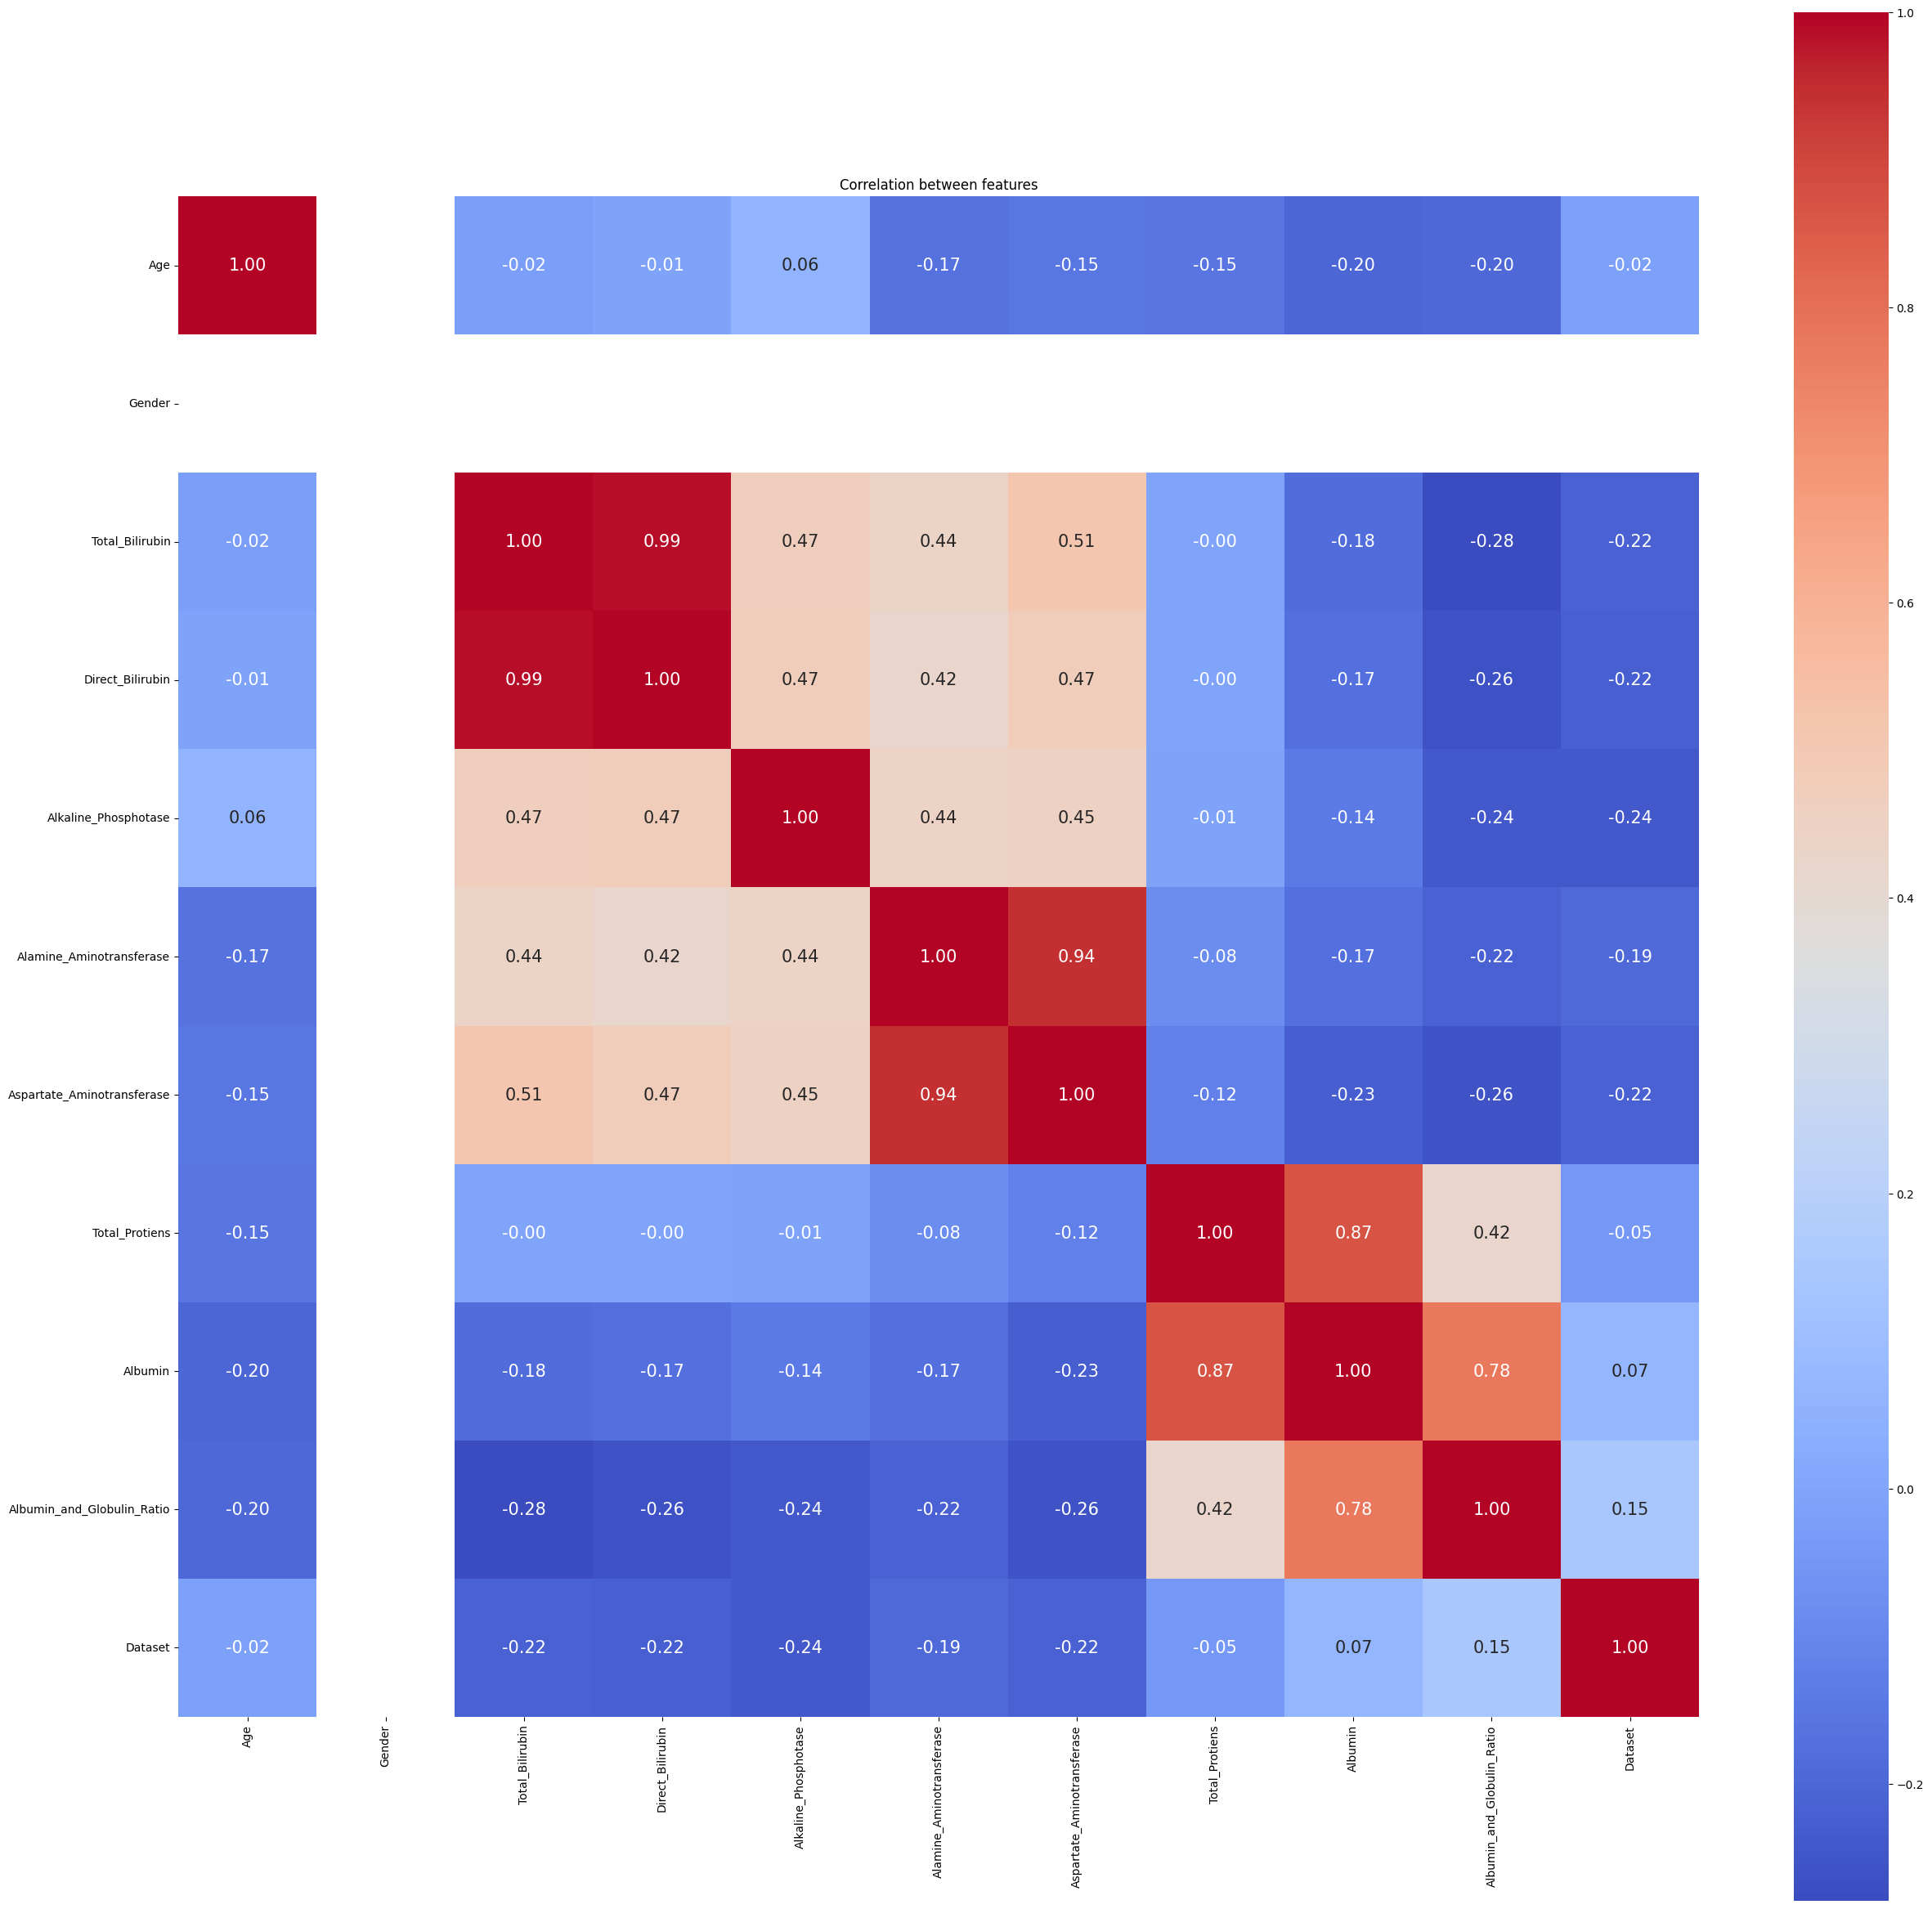

In [46]:
# Finding Correlations between features to have only independent features
liver_corr = liver_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.title('Correlation between features')
# Direct_Bilirubin & Total_Bilirubin 0.87
# Alamine_Aminotransferase & Aspartate_Aminotransferase 0.79
# Albumin and Total Protein  0.78
# albumin_and_globulin_ratio & albumin 0.69

In [47]:
# dropping highly correlated features as features should be independent
liver_data.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Total_Protiens',
'Albumin'], axis=1, inplace=True)

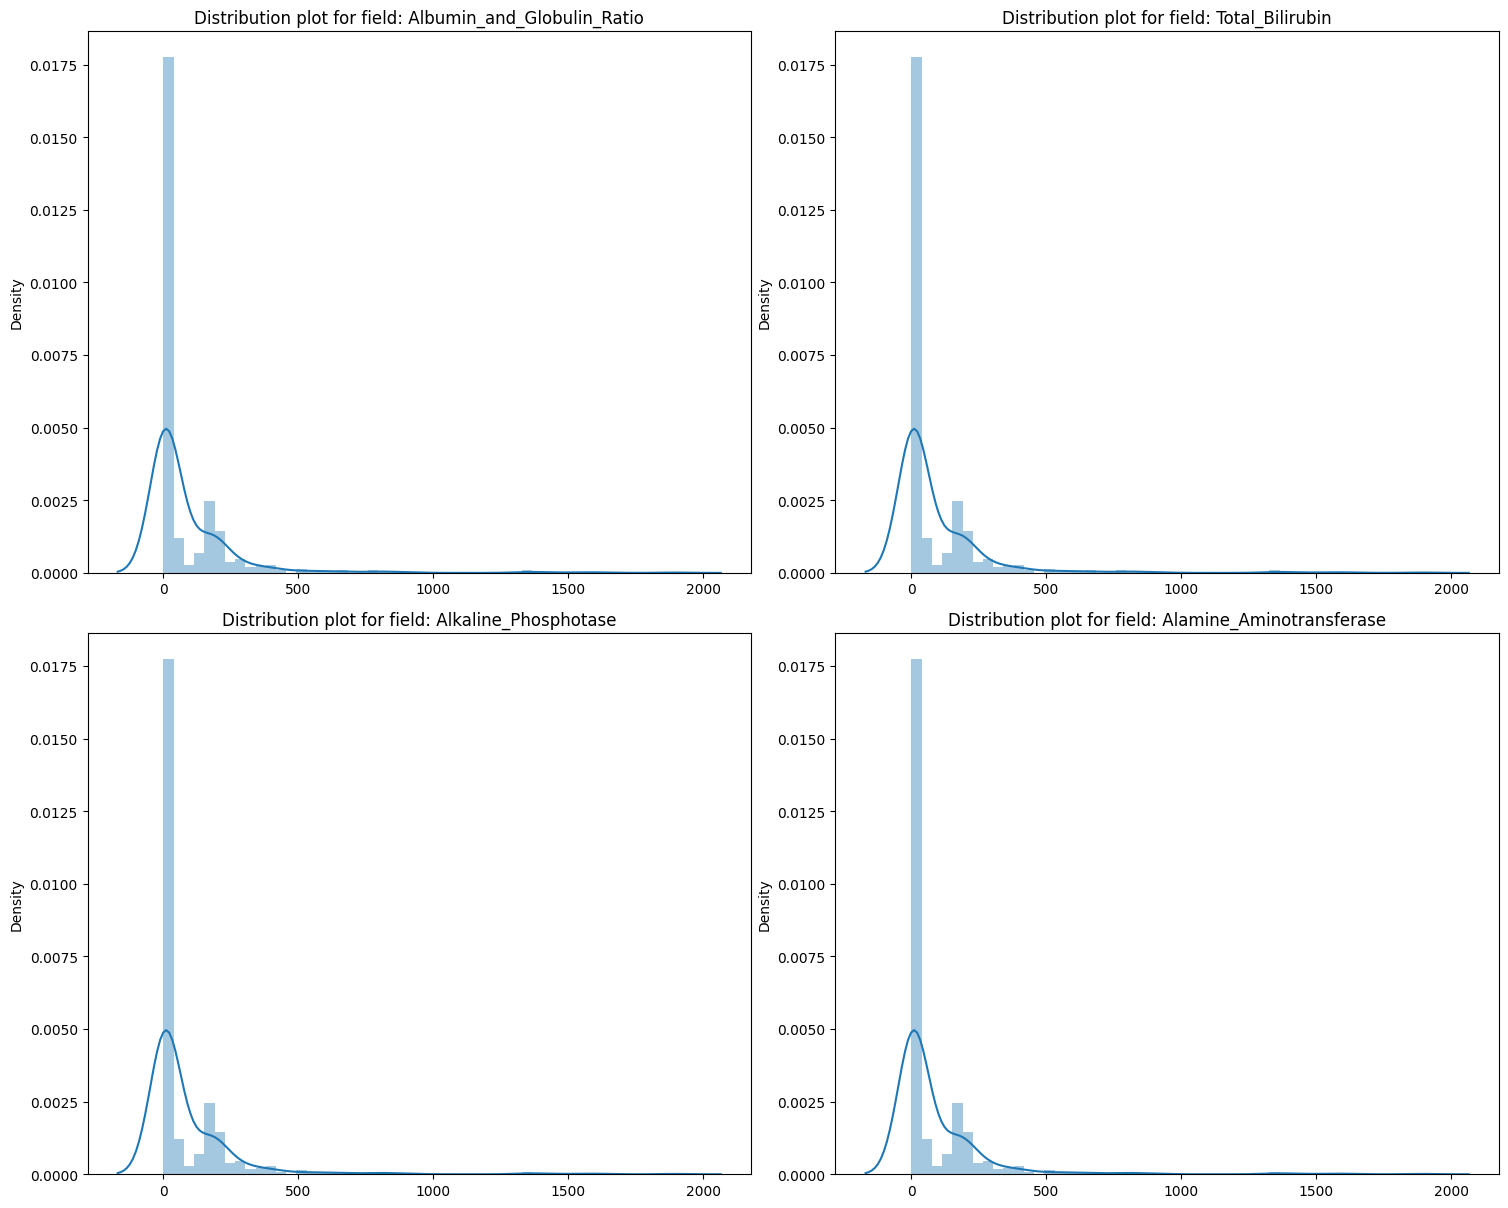

In [48]:
#Data Analysis shows skewness
plt.figure(figsize=(15, 12))
features = ['Albumin_and_Globulin_Ratio', 'Total_Bilirubin', 'Alkaline_Phosphotase',
'Alamine_Aminotransferase']
num_rows = (len(features) - 1) // 2 + 1
num_cols = 2
for i, feature in enumerate(features):
  plt.subplot(num_rows, num_cols, i+1)
  sns.distplot(liver_data[features])
  plt.title('Distribution plot for field: ' + feature)
  plt.xlabel('')
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


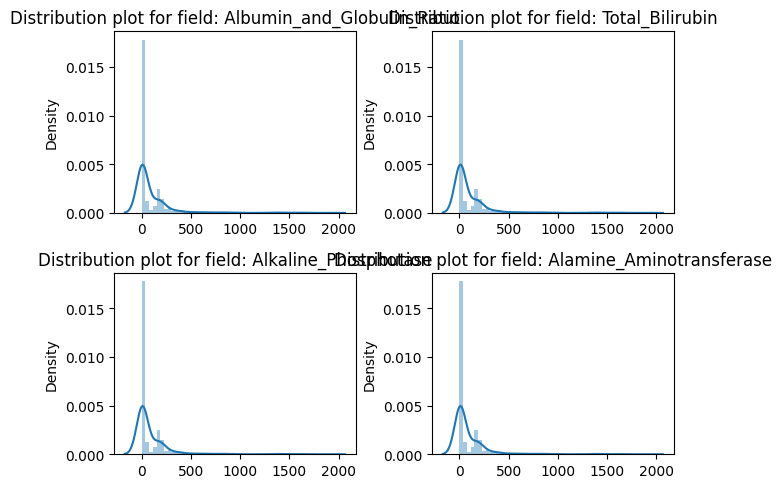

In [49]:
for i, feature in enumerate(features):
  plt.subplot(num_rows, num_cols, i+1)
  sns.distplot(liver_data[features])
  plt.title('Distribution plot for field: ' + feature)
  plt.xlabel('')
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [50]:
skewness = liver_data.skew().abs()  # Absolute skewness values
print(skewness)
#These features with high skewness
skewed = ['Albumin_and_Globulin_Ratio','Total_Bilirubin', 'Alkaline_Phosphotase',
'Alamine_Aminotransferase']

Age                           0.135502
Gender                        0.000000
Total_Bilirubin               3.986934
Alkaline_Phosphotase          3.335815
Alamine_Aminotransferase      5.135541
Albumin_and_Globulin_Ratio    0.658574
Dataset                       0.625887
dtype: float64


In [51]:
# Apply log1p transformation on dataframe - just selected values to reduce skewness
for i in skewed:
 liver_data[i] = liver_data[i].apply('log1p')

In [52]:
#Scaling & Encoding
from sklearn.preprocessing import LabelEncoder, RobustScaler
# gender contains string values Male, Female; these will be converted into 0, 1, as ML algorithms like just numerical values
le = LabelEncoder()
liver_data['Gender'] = le.fit_transform(liver_data['Gender'])
liver_data.Gender.head()

,Gender
0,0
1,0
2,0
3,0
4,0


In [53]:
# Get all attribute names except 'Dataset'
attributes = [col for col in liver_data.columns if col != 'Dataset']
rs = RobustScaler()
liver_data[attributes] = rs.fit_transform(liver_data[attributes])

In [54]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
0,0.909091,0.0,-0.270497,-0.068432,-0.563907,0.000000,0
1,-0.863636,0.0,0.255868,-0.406115,-0.563907,0.332748,0
2,-0.727273,0.0,0.255868,0.065867,-0.716472,0.649257,0
3,1.318182,0.0,0.729503,0.166344,-0.195447,0.332748,0
4,-0.227273,0.0,0.255868,0.713836,2.627045,-0.350743,0


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(liver_data.drop("Dataset", axis=1),liver_data["Dataset"], test_size=0.3)

In [56]:
#Model Training
classifier = xgb.XGBClassifier()
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
#Accuracy
print('Training accuracy {:.4f}'.format(classifier.score(X_train,Y_train)))
print('Testing accuracy {:.4f}'.format(classifier.score(X_test,Y_test)))

Training accuracy 1.0000
Testing accuracy 0.6977


In [58]:
#Making a Predictive System
input_data = (40,0,6.6,183,91,0.7)

In [59]:
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [60]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [61]:
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
 print('The person does not have liver disease')
else:
 print('The person has liver disease')

[0]
The person does not have liver disease


In [62]:
# Saving the trained model
import pickle
filename = 'liver_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [63]:
#explain prediction with the shap values
explainer=shap.Explainer(classifier)
shap_values=explainer(X_test)

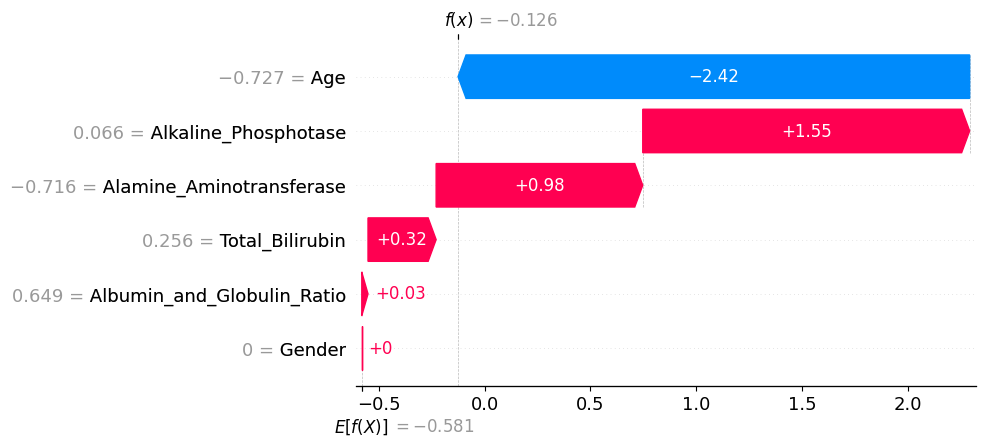

In [64]:
#visualize the shap values for a specific instance
shap.plots.waterfall(shap_values[0])

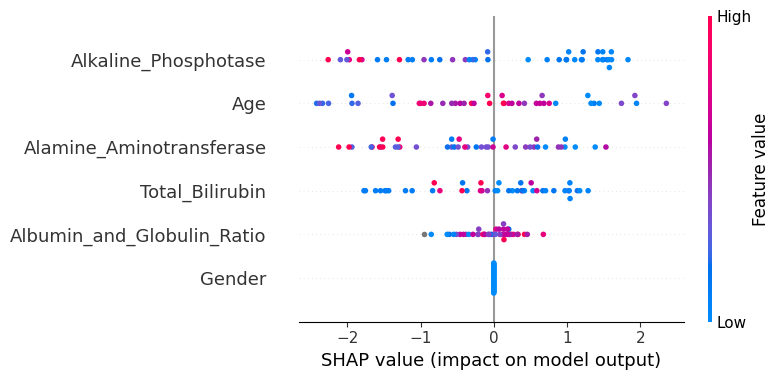

In [65]:
#summary plot of shap values
shap.summary_plot(shap_values,X_test)

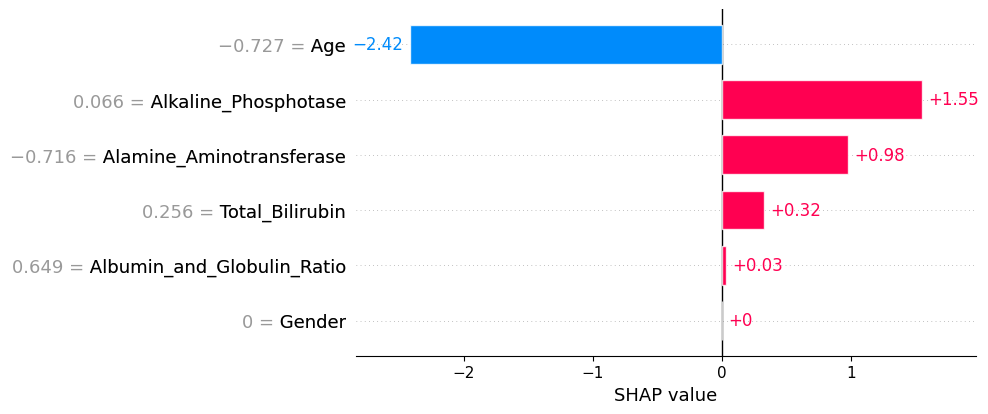

In [66]:
shap.plots.bar(shap_values[0])

In [67]:
# Index of the prediction you want to explain
prediction_index = 0

In [68]:
# Get SHAP values for the specific prediction
shap_values_pred = shap_values[prediction_index]

In [69]:
# Get the absolute SHAP values and corresponding feature names
abs_shap_values = np.abs(shap_values_pred.values)
feature_names = X_train.columns

In [70]:
# Sort the absolute SHAP values and feature names by the absolute SHAP values
sorted_indices = np.argsort(abs_shap_values)[::-1]
sorted_abs_shap_values = abs_shap_values[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

In [71]:
# Print the features responsible for the prediction
print("Features responsible for the prediction:")
for feature, shap_value in zip(sorted_feature_names, sorted_abs_shap_values):
    print(f"{feature}: {shap_value}")

Features responsible for the prediction:
Age: 2.419771909713745
Alkaline_Phosphotase: 1.5462521314620972
Alamine_Aminotransferase: 0.977262020111084
Total_Bilirubin: 0.32226258516311646
Albumin_and_Globulin_Ratio: 0.029372112825512886
Gender: 0.0


In [72]:
threshold = 0.05

In [73]:
for feature, shap_value in zip(feature_names, abs_shap_values):
    if np.abs(shap_value) >= threshold:
        print(f"{feature}: {shap_value}")

Age: 2.419771909713745
Total_Bilirubin: 0.32226258516311646
Alkaline_Phosphotase: 1.5462521314620972
Alamine_Aminotransferase: 0.977262020111084


In [74]:
!wget -q -O - ipv4.icanhazip.com

35.223.176.228


In [75]:
%%writefile app.py
import pickle
import requests
import streamlit as st
from streamlit_option_menu import option_menu
import openai
import pandas as pd
import numpy as np
import shap
from langchain_community.llms import HuggingFaceEndpoint

st.set_page_config(
    page_title="Healthcare System",
    page_icon=":health_worker:",
    layout="centered",
    initial_sidebar_state="expanded"
)

hide_streamlit_style = """
<style>
MainMenu {visibility: hidden;}
footer {visibility: hidden;}
</style>
"""
st.markdown(hide_streamlit_style, unsafe_allow_html=True)

# Loading the saved models
diabetes_model = pickle.load(open("/content/diabetes_model.pkl", 'rb'))
heart_disease_model = pickle.load(open("/content/heart_disease_model.pkl", 'rb'))
liver_model = pickle.load(open("/content/liver_model.pkl", 'rb'))
scaler = pd.read_pickle('/content/drive/MyDrive/Chatbot/1/Scaler.pkl')

# Sidebar for navigation
with st.sidebar:
    selected = option_menu('Healthcare System', ['Diabetes Prediction', 'Heart Disease Prediction', 'Liver Disease Prediction'],
                           icons=['droplet-fill', 'heart', 'person'], default_index=0)

if selected == 'Diabetes Prediction':
    # Page title
    st.title('Diabetes Prediction')
    st.markdown("Note: 1: Gender (Female: 0, Male: 1)")
    st.markdown("Note: 2: Smoking History (never: 0, No Info: 1, current: 2, former: 3, ever: 4, not current: 5)")
    st.markdown("Note: 3: Heart Disease (No: 0, Yes: 1)")

    # Input fields
    col1, col2, col3 = st.columns(3)
    with col1:
        gender = st.text_input('Gender')
        gender = float(gender) if gender else 0.0
    with col2:
        age = st.text_input('Age')
        age = float(age) if age else 0.0
    with col3:
        hypertension = st.text_input('Hypertension Value')
        hypertension = float(hypertension) if hypertension else 0.0
    with col1:
        heart_disease = st.text_input('Heart Disease')
        heart_disease = float(heart_disease) if heart_disease else 0.0
    with col2:
        smoking_history = st.text_input('Smoking_history Level')
        smoking_history = float(smoking_history) if smoking_history else 0.0
    with col3:
        BMI = st.text_input('BMI value')
        BMI = float(BMI) if BMI else 0.0
    with col1:
        HbA1c_level = st.text_input('HbA1c_level value')
        HbA1c_level = float(HbA1c_level) if HbA1c_level else 0.0
    with col2:
        blood_glucose_level = st.text_input('Blood Glucose Level')
        blood_glucose_level = float(blood_glucose_level) if blood_glucose_level else 0.0

    # Perform prediction
    diab_diagnosis = ''
    if st.button('Diabetes Test Result'):
        input_data = np.array([[gender, age, hypertension, heart_disease, smoking_history, BMI, HbA1c_level, blood_glucose_level]], dtype=object)
        input_data = input_data.astype(float)
        diab_prediction = diabetes_model.predict(input_data)
        if diab_prediction[0] == 1:
            diab_diagnosis = 'The person is predicted to have diabetes.'
            st.error(diab_diagnosis)

            # SHAP explanations
            dataset = pd.read_csv("/content/drive/MyDrive/data sets/diabetes.csv")
            explainer = shap.Explainer(diabetes_model)
            shap_values = explainer(input_data)

            # Print features responsible for the prediction
            prediction_index = 0
            shap_values_pred = shap_values[prediction_index]
            abs_shap_values = np.abs(shap_values_pred.values)
            feature_names = dataset.columns

            # Filter features with contribution more than 50%
            selected_features = [(feature, shap_value) for feature, shap_value in zip(feature_names, abs_shap_values) if shap_value > 0.5]

            # Display selected features
            if selected_features:
                st.write("Features with contribution more than 50%:")
                for feature, shap_value in selected_features:
                    st.write(f"{feature}: {shap_value}")
            else:
                st.write("No features with contribution more than 50%.")

            # Chatbot
            huggingfacehub_api_token = ""
            llm = HuggingFaceEndpoint(repo_id='tiiuae/falcon-7b-instruct', huggingfacehub_api_token=huggingfacehub_api_token)

            st.title("Healthcare Chatbot")
            st.markdown("Welcome to the Healthcare Chatbot! How can I assist you today?")

            # User input
            for feature, shap_value in selected_features:
                user_query = ""
                if feature == 'smoking_history':
                    user_query = "Recommendation for quitting smoking or reducing smoking frequency."
                elif feature == 'blood_glucose_level':
                    user_query = "Recommendation for maintaining blood glucose level."
                elif feature == 'hypertension':
                    user_query = "Recommendation for maintaining hypertension."
                elif feature == 'heart_disease':
                    user_query = "Recommendation for curing heart disease."
                elif feature == 'HbA1c_level':
                    user_query = "Recommendation for maintaining HbA1c level."

                if user_query:
                    bot_response = llm.invoke(user_query)
                    bot_response_html = f'<div style="overflow-wrap: break-word; height: auto; padding: 10px;">{user_query}</div>'
                    st.markdown(bot_response_html, unsafe_allow_html=True)
                    st.write(bot_response)

        else:
            diab_diagnosis = 'The person is predicted to be healthy.'
            st.success(diab_diagnosis)

# Heart Disease Prediction Page
if selected == 'Heart Disease Prediction':
    # Page title
    st.title('Heart Disease Prediction')
    st.markdown("Note: 1: Gender (Female: 0, Male: 1)")
    st.markdown("Note: 2: Thal (Normal: 0, Fixed Defect: 1, Reversible Defect: 2)")

    col1, col2, col3 = st.columns(3)
    col4, col5, col6 = st.columns(3)
    col7, col8, col9 = st.columns(3)
    col10, col11, col12, col13 = st.columns(4)

    # Input fields
    with col1:
        age = st.text_input('Age')
        age = float(age) if age else 0.0
    with col2:
        gender = st.text_input('Gender')
        gender = float(gender) if gender else 0.0
    with col3:
        cp = st.text_input('Chest Pain types')
        cp = float(cp) if cp else 0.0
    with col4:
        trestbps = st.text_input('Resting Blood Pressure')
        trestbps = float(trestbps) if trestbps else 0.0
    with col5:
        chol = st.text_input('Serum Cholestoral')
        chol = float(chol) if chol else 0.0
    with col6:
        fbs = st.text_input('Fasting Blood Sugar')
        fbs = float(fbs) if fbs else 0.0
    with col7:
        restecg = st.text_input('Resting Electrocardiographic results')
        restecg = float(restecg) if restecg else 0.0
    with col8:
        thalach = st.text_input('Maximum Heart Rate achieved')
        thalach = float(thalach) if thalach else 0.0
    with col9:
        exang = st.text_input('Exercise Induced Angina')
        exang = float(exang) if exang else 0.0
    with col10:
        oldpeak = st.text_input('ST depression induced by exercise')
        oldpeak = float(oldpeak) if oldpeak else 0.0
    with col11:
        slope = st.text_input('Slope of the peak exercise ST segment')
        slope = float(slope) if slope else 0.0
    with col12:
        ca = st.text_input('Major vessels colored by fluoroscopy')
        ca = float(ca) if ca else 0.0
    with col13:
        thal = st.text_input('Thal Value')
        thal = float(thal) if thal else 0.0

    # Perform prediction
    heart_diagnosis = ''
    if st.button('Heart Disease Test Result'):
        input_data = np.array([[age, gender, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]], dtype=object)
        input_data = input_data.astype(float)
        heart_prediction = heart_disease_model.predict(input_data)
        if heart_prediction[0] == 1:
            heart_diagnosis = 'The person is predicted to have heart disease.'
            st.error(heart_diagnosis)

            # SHAP explanations
            dataset = pd.read_csv("/content/drive/MyDrive/data sets/heart.csv")
            explainer = shap.Explainer(heart_disease_model)
            shap_values = explainer(input_data)

            # Print features responsible for the prediction
            prediction_index = 0
            shap_values_pred = shap_values[prediction_index]
            abs_shap_values = np.abs(shap_values_pred.values)
            feature_names = dataset.columns

            # Filter features with contribution more than 50%
            selected_features = [(feature, shap_value) for feature, shap_value in zip(feature_names, abs_shap_values) if shap_value > 0.5]

            # Display selected features
            if selected_features:
                st.write("Features with contribution more than 50%:")
                for feature, shap_value in selected_features:
                    st.write(f"{feature}: {shap_value}")
            else:
                st.write("No features with contribution more than 50%.")

            # Chatbot
            huggingfacehub_api_token = ""
            llm = HuggingFaceEndpoint(repo_id='tiiuae/falcon-7b-instruct', huggingfacehub_api_token=huggingfacehub_api_token)

            st.title("Healthcare Chatbot")
            st.markdown("Welcome to the Healthcare Chatbot! How can I assist you today?")

            # User input
            for feature, shap_value in selected_features:
                user_query = ""
                if feature == 'trestbps':
                    user_query = "Recommendation for maintaining resting blood pressure."
                elif feature == 'chol':
                    user_query = "Recommendation for maintaining serum cholesterol."
                elif feature == 'fbs':
                    user_query = "Recommendation for maintaining fasting blood sugar."
                elif feature == 'restecg':
                    user_query = "Recommendation for improving resting electrocardiographic results."
                elif feature == 'thalach':
                    user_query = "Recommendation for improving maximum heart rate achieved."
                elif feature == 'exang':
                    user_query = "Recommendation for managing exercise-induced angina."

                if user_query:
                    bot_response = llm.invoke(user_query)
                    bot_response_html = f'<div style="overflow-wrap: break-word; height: auto; padding: 10px;">{user_query}</div>'
                    st.markdown(bot_response_html, unsafe_allow_html=True)
                    st.write(bot_response)
        else:
            heart_diagnosis = 'The person is predicted to be healthy.'
            st.success(heart_diagnosis)

# Liver Disease Prediction Page
if selected == 'Liver Disease Prediction':
    # Page title
    st.title('Liver Disease Prediction')
    st.markdown("Note: 1: Gender (Female: 0, Male: 1)")

    col1, col2, col3 = st.columns(3)
    col4, col5, col6 = st.columns(3)
    col7, col8, col9 = st.columns(3)
    col10, col11, col12, col13 = st.columns(4)

    # Input fields
    with col1:
        age = st.text_input('Age')
        age = float(age) if age else 0.0
    with col2:
        gender = st.text_input('Gender')
        gender = float(gender) if gender else 0.0
    with col3:
        tb = st.text_input('Total Bilirubin')
        tb = float(tb) if tb else 0.0
    with col4:
        db = st.text_input('Direct Bilirubin')
        db = float(db) if db else 0.0
    with col5:
        ap = st.text_input('Alkaline Phosphotase')
        ap = float(ap) if ap else 0.0
    with col6:
        aa1 = st.text_input('Alamine Aminotransferase')
        aa1 = float(aa1) if aa1 else 0.0
    with col7:
        aa2 = st.text_input('Aspartate Aminotransferase')
        aa2 = float(aa2) if aa2 else 0.0
    with col8:
        tp = st.text_input('Total Protiens')
        tp = float(tp) if tp else 0.0
    with col9:
        a = st.text_input('Albumin')
        a = float(a) if a else 0.0
    with col10:
        agr = st.text_input('Albumin and Globulin Ratio')
        agr = float(agr) if agr else 0.0

    # Perform prediction
    liver_diagnosis = ''
    if st.button('Liver Disease Test Result'):
        input_data = np.array([[age, gender, tb, db, ap, aa1, aa2, tp, a, agr]], dtype=object)
        input_data = input_data.astype(float)
        input_data = scaler.transform(input_data)  # Apply scaling
        liver_prediction = liver_model.predict(input_data)
        if liver_prediction[0] == 1:
            liver_diagnosis = 'The person is predicted to have liver disease.'
            st.error(liver_diagnosis)

            # SHAP explanations
            dataset = pd.read_csv("/content/drive/MyDrive/data sets/liver.csv")
            explainer = shap.Explainer(liver_model)
            shap_values = explainer(input_data)

            # Print features responsible for the prediction
            prediction_index = 0
            shap_values_pred = shap_values[prediction_index]
            abs_shap_values = np.abs(shap_values_pred.values)
            feature_names = dataset.columns

            # Filter features with contribution more than 50%
            selected_features = [(feature, shap_value) for feature, shap_value in zip(feature_names, abs_shap_values) if shap_value > 0.5]

            # Display selected features
            if selected_features:
                st.write("Features with contribution more than 50%:")
                for feature, shap_value in selected_features:
                    st.write(f"{feature}: {shap_value}")
            else:
                st.write("No features with contribution more than 50%.")

            # Chatbot
            huggingfacehub_api_token = ""
            llm = HuggingFaceEndpoint(repo_id='tiiuae/falcon-7b-instruct', huggingfacehub_api_token=huggingfacehub_api_token)

            st.title("Healthcare Chatbot")
            st.markdown("Welcome to the Healthcare Chatbot! How can I assist you today?")

            # User input
            for feature, shap_value in selected_features:
                user_query = ""
                if feature == 'tb':
                    user_query = "Recommendation for maintaining total bilirubin levels."
                elif feature == 'db':
                    user_query = "Recommendation for maintaining direct bilirubin levels."
                elif feature == 'ap':
                    user_query = "Recommendation for maintaining alkaline phosphatase levels."
                elif feature == 'aa1':
                    user_query = "Recommendation for maintaining alamine aminotransferase levels."
                elif feature == 'aa2':
                    user_query = "Recommendation for maintaining aspartate aminotransferase levels."
                elif feature == 'tp':
                    user_query = "Recommendation for maintaining total protein levels."
                elif feature == 'a':
                    user_query = "Recommendation for maintaining albumin levels."
                elif feature == 'agr':
                    user_query = "Recommendation for maintaining the albumin and globulin ratio."

                if user_query:
                    bot_response = llm.invoke(user_query)
                    bot_response_html = f'<div style="overflow-wrap: break-word; height: auto; padding: 10px;">{user_query}</div>'
                    st.markdown(bot_response_html, unsafe_allow_html=True)
                    st.write(bot_response)
        else:
            liver_diagnosis = 'The person is predicted to be healthy.'
            st.success(liver_diagnosis)


Writing app.py


In [76]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 3s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠸

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙your url is: https://ninety-corners-sneeze.loca.lt



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.223.176.228:8501

